## Capstone Project: Predicting Road Accident Severity for Collisions in Junctions
# Introduction
Road safety is considered one of the most important problem of the world. Accidents that occur in junctions can be slight, fatal and serious. Hence it is very important to be able to reduce the risk of severity before accidents occur. And for this project, the aim is to build a model that can predict the severity of accidents in junctions around different types of address block and collision types using attributes such as weather and light conditions.

# Target Audience:
The audience of this project are the local authorities and the police. For instance, this project can help lead local authorities discover the address type where severity of a road accident is serious due to lack of road lighting, and hence this could then lead to applying new road safety measures.

# Data
The features used will be: • SEVERITYCODE • ADDRTYPE • JUNCTIONTYPE • SDOT_COLDESC (Description of the collision) • WEATHER • LIGHTCOND

# The data used for this study is given by the Applied Data Science Capstone course on Coursera.org via the following link https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.

The dataset has information gathered on the road traffic accidents of Seattle City. The initial dataset consists of 38 columns (features/attributes) and 194673 rows. Python packages will be used to conduct this study. The dataset will be cleaned according to the requirements of this project. Missing data information will either be substituted using valid means or dropped – considering the amount of missing data and the description of individual elements.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("C:\py19\Data-Collisions (2).csv")
df


C:\Users\taran\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [5]:
df.shape

(194673, 38)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

# Data Wrangling
We are only interested in
SEVERITYCODE, ADDRTYPE, JUNCTIONTYPE, SDOT_COLDESC, WEATHER, LIGHTCOND

SEVERITYCODE:
1 = Property Damage Only Collision

2 = Injury Collision

In [7]:
# We drop all columns expect the listed above
df.drop(df.columns.difference(['SEVERITYDESC', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'WEATHER', 'LIGHTCOND'])\
, axis=1, inplace=True)
df.head()

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight


In [8]:
#show in a df format null value in boolean results
null_values=df.isnull()
null_values

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
194668,False,False,False,False,False,False
194669,False,False,False,False,False,False
194670,False,False,False,False,False,False
194671,False,False,False,False,False,False


In [9]:
# Check null elements
for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts().sort_values(ascending=True))
    print("")

ADDRTYPE
True       1926
False    192747
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

JUNCTIONTYPE
True       6329
False    188344
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

WEATHER
True       5081
False    189592
Name: WEATHER, dtype: int64

LIGHTCOND
True       5170
False    189503
Name: LIGHTCOND, dtype: int64



## We see we have some null values, so we can either replace these elements with the most frequent or drop these rows. We will check the percentage of rows wil nans

In [10]:
#gives statistics for categorical variables
df.describe(include='O')

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
count,192747,194673,188344,194673,189592,189503
unique,3,2,7,39,11,9
top,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
freq,126926,136485,89800,85209,111135,116137


In [11]:
df_with_nans=df.dropna()
df_with_nans.shape

(182954, 6)

In [12]:
a=(1-(182954/194673))*100
print("%.2f" % a,"%")

6.02 %


In [13]:
# With 6.02% rows with nans, we will drop these rows
df=df.dropna()
df.shape

(182954, 6)

In [14]:
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
...,...,...,...,...,...,...
194668,Block,Injury Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
194669,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight
194670,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
194671,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk


In [15]:
# we will resit index to correct rows numbers
df=df.reset_index(drop=True)
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
...,...,...,...,...,...,...
182949,Block,Injury Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
182950,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight
182951,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
182952,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk


In [16]:
#Also check to confirm no more null values
df.isnull().sum()

ADDRTYPE        0
SEVERITYDESC    0
JUNCTIONTYPE    0
SDOT_COLDESC    0
WEATHER         0
LIGHTCOND       0
dtype: int64

In [17]:
#Check groups of features
print("ADDRTYPE: \n", df['ADDRTYPE'].value_counts() )
print("LIGHTCOND: \n",df['LIGHTCOND'].value_counts())

print("\n WEATHER: \n",df['WEATHER'].value_counts())
print("\n JUNCTIONTYPE: \n",df['JUNCTIONTYPE'].value_counts())
print("\n SDOT_COLDESC: \n",df['SDOT_COLDESC'].value_counts())

ADDRTYPE: 
 Block           119393
Intersection     63326
Alley              235
Name: ADDRTYPE, dtype: int64
LIGHTCOND: 
 Daylight                    113868
Dark - Street Lights On      47563
Unknown                      10453
Dusk                          5775
Dawn                          2454
Dark - No Street Lights       1462
Dark - Street Lights Off      1158
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

 WEATHER: 
 Clear                       109084
Raining                      32653
Overcast                     27200
Unknown                      11642
Snowing                        881
Other                          747
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

 JUNCTIONTYPE: 
 Mid-Block (not related to intersection)              86635
At Intersection (intersection

# Data Visualisation and Exploratory

(-1000, 80000)

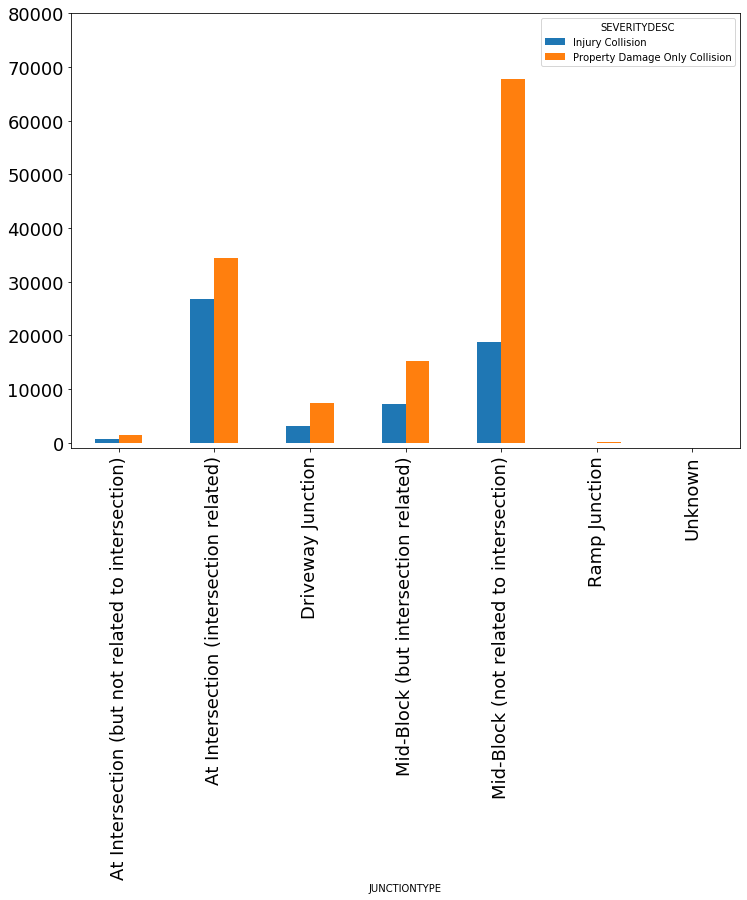

In [20]:
df.groupby(['JUNCTIONTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,80000))

(-1000, 100000)

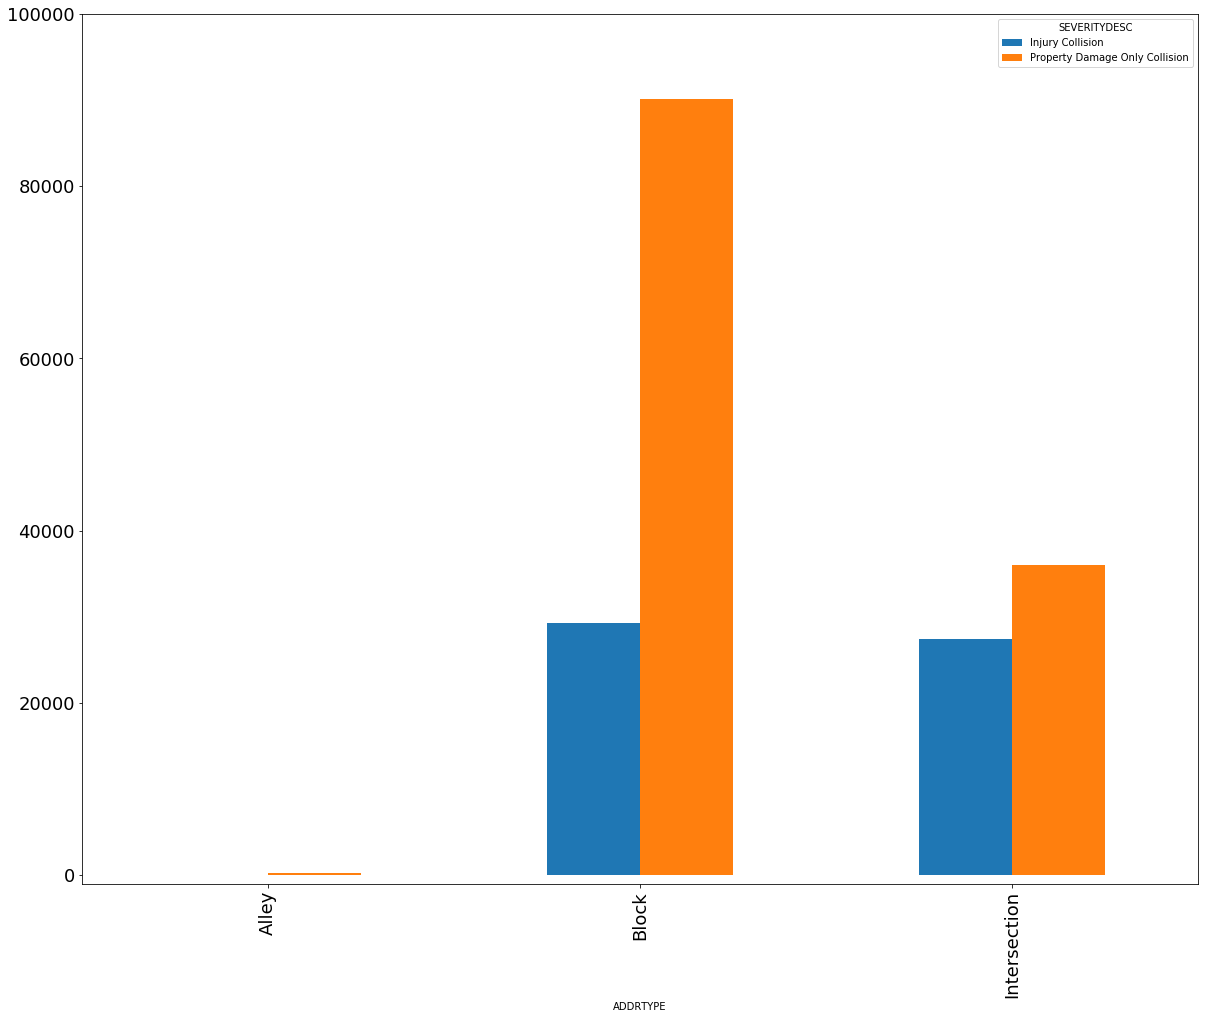

In [21]:
df.groupby(['ADDRTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', figsize=(20,16), legend=True, fontsize=18)
plt.ylim((-1000, 100000))

# Data Wrangling (Back)
##### Looking at the elements I am going to use One Hot Encoding to turn these categorical variables to numerical variables but before we will check data type and convert them

In [22]:
df.dtypes

ADDRTYPE        object
SEVERITYDESC    object
JUNCTIONTYPE    object
SDOT_COLDESC    object
WEATHER         object
LIGHTCOND       object
dtype: object

In [23]:
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
...,...,...,...,...,...,...
182949,Block,Injury Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
182950,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Daylight
182951,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
182952,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dusk


In [45]:
Feature=df['SEVERITYDESC']
Feature=pd.concat([Feature, pd.get_dummies(df[['ADDRTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','LIGHTCOND']])], axis=1)

Feature.head()

,SEVERITYDESC,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
Feature.drop(['SEVERITYDESC'], axis=1, inplace=True)
Feature

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182949,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
182950,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
182951,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182952,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
X=Feature
X[0:5]

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
y=df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

print("Feature shape:", Feature.shape)
print("X shape:",X.shape)
print ("y shape:", y.shape) 

## Model Development and Evaluation

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (146363, 69) (146363,)
test set: (36591, 69) (36591,)


## Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [58]:
#Modelling phase
Accident_Severity_Model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accident_Severity_Model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
#Predicting phase
Predicting_Severity=Accident_Severity_Model.predict(X_test)
print(Predicting_Severity [0:5])
print(y_test [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Injury Collision']


In [60]:
#Accuracy of the model using sklearn
from sklearn import metrics
print("Decision Tress Accuracy:", metrics.accuracy_score(y_test, Predicting_Severity))

Decision Tress Accuracy: 0.7380503402476019


# Evaluation

In [61]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [62]:
Tree_Prediction=Accident_Severity_Model.predict(X_test)
jc=jaccard_similarity_score(y_test, Tree_Prediction)
fs=f1_score(y_test, Tree_Prediction, average='weighted')

C:\Users\taran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [63]:
list_jc = [jc]
list_fs = [fs]

In [64]:
df = pd.DataFrame(list_jc, index=['Decision Tree'])

df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)

df

,Jaccard,F1-score
Decision Tree,0.73805,0.668051
